<div class="alert block-alert alert-success">
    <h1>Workshop - AB-test</h1> <span class="tocSkip"></span>
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-анализа" data-toc-modified-id="Подготовка-данных-для-анализа-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных для анализа</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Проверка-данных-на-наличие-null-и-странных-значений" data-toc-modified-id="Проверка-данных-на-наличие-null-и-странных-значений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка данных на наличие null и странных значений</a></span></li><li><span><a href="#Проверка-распределений-по-категориям" data-toc-modified-id="Проверка-распределений-по-категориям-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка распределений по категориям</a></span></li></ul></li><li><span><a href="#Анализ-рядов-признаков" data-toc-modified-id="Анализ-рядов-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ рядов признаков</a></span><ul class="toc-item"><li><span><a href="#Общая-картина-распределений-двух-вирусов-(вируса-Т,-вируса-G)" data-toc-modified-id="Общая-картина-распределений-двух-вирусов-(вируса-Т,-вируса-G)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Общая картина распределений двух вирусов (вируса-Т, вируса-G)</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li><li><span><a href="#Анализ-воздействия-двух-вирусов-(вируса-Т,-вируса-G)-в-разрезе-городов-и-гендера" data-toc-modified-id="Анализ-воздействия-двух-вирусов-(вируса-Т,-вируса-G)-в-разрезе-городов-и-гендера-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ воздействия двух вирусов (вируса-Т, вируса-G) в разрезе городов и гендера</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-связи-между-средним-пульсом-человека-и-интенсивностью-распространения-G-и-T-вирусов" data-toc-modified-id="Анализ-связи-между-средним-пульсом-человека-и-интенсивностью-распространения-G-и-T-вирусов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ связи между средним пульсом человека и интенсивностью распространения G и T-вирусов</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li></ul></div>

### Задача

Требуется определить, как воздействие вируса-Т отличается от воздействия вируса-G на основании биологического показателя объёма вирусной ткани в организме (колонка VIRUS в исходном файле). 

Необходимо также рассмотреть воздействие этих двух вирусов в разрезе городов и гендера.

Исследуйте также взаимосвязь между средним пульсом человека (можно взять из файла Umbrella_Data) и интенсивностью распространения G и T-вирусов. 

Какие выводы можно сделать и какие рекомендации?

### Описание данных

**Umbrella_Experiment**

- `ID_SIMPERS` - id человека
- `VIRUS` - метрика объема и интенсивности распространения вирусной ткани в организме
- `ID_GROUP` - экспериментальная группа
    - А - контрольное воздействие (G-вирус)
    - В - новое, тестовое воздействие (T-вирус)
- `GENDER` - пол
- `ID_CITY` - симулированный город

**Umbrella_Data**

- `ID_SIMPERS` - id человека
- `PULSE` - средний пульс человека

<div class="alert block-alert alert-info">
</div>

## Подготовка данных для анализа
[top](#Table-of-Contents)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Импорт данных

In [51]:
df1 = pd.read_csv('Umbrella_experiment.csv', sep = ';', decimal = ',')
df2 = pd.read_csv('Umbrella_Data.csv', sep = ';', decimal = ',')

In [47]:
df1.head()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
0,1007416,3.58,B,F,New York
1,1001664,5.80,A,M,Moscow
2,1007900,3.37,B,F,Tokyo
3,1006219,3.81,B,M,New York
4,1005224,4.32,A,M,New York


### Проверка данных на наличие null и странных значений

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_SIMPERS  9537 non-null   int64  
 1   VIRUS       9502 non-null   float64
 2   ID_GROUP    9517 non-null   object 
 3   GENDER      9517 non-null   object 
 4   ID_CITY     9537 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 372.7+ KB


In [50]:
# Проверяю, если ли null
df1.isnull().sum()

ID_SIMPERS     0
VIRUS         35
ID_GROUP      20
GENDER        20
ID_CITY        0
dtype: int64

In [6]:
df1[df1.isnull().any(axis=1)] # оцениваю строки с null

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
316,1009340,NaN,A,F,Moscow
498,1009393,5.93,NaN,NaN,New York
583,1009366,NaN,B,F,Tokyo
1071,1009391,3.15,NaN,NaN,New York
1270,1009378,3.46,NaN,NaN,New York
1493,1009348,NaN,A,F,Moscow
1595,1009364,NaN,B,F,Tokyo
1677,1009343,NaN,A,M,Moscow
1686,1009380,5.59,NaN,NaN,New York
1695,1009352,NaN,A,M,Tokyo


In [7]:
df1.dropna(inplace=True) # очищаю датасет от null значений

In [8]:
df1.describe(percentiles=None, include='all')

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
count,9.482000e+03,9482.000000,9482,9482,9482
unique,NaN,NaN,2,2,4
top,NaN,NaN,B,F,Moscow
freq,NaN,NaN,4763,4956,4825
mean,1.004672e+06,4.584830,NaN,NaN,NaN
std,2.698678e+03,0.767249,NaN,NaN,NaN
min,1.000001e+06,2.900000,NaN,NaN,NaN
25%,1.002334e+06,4.052500,NaN,NaN,NaN
50%,1.004670e+06,4.590000,NaN,NaN,NaN
75%,1.007008e+06,5.130000,NaN,NaN,NaN


<AxesSubplot:>

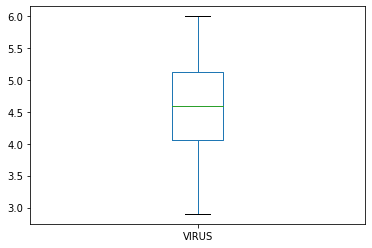

In [9]:
df1.boxplot(column = 'VIRUS', grid = False) # посмотрю есть ли выбросы

<AxesSubplot:xlabel='VIRUS', ylabel='Count'>

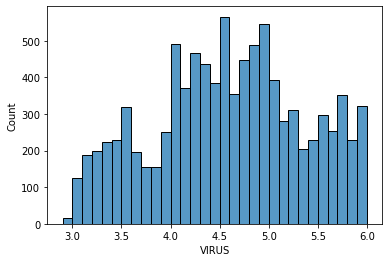

In [10]:
sns.histplot(df1['VIRUS']) # посмотрю на распределение

In [11]:
df1['ID_GROUP'].unique() #проверю, чтобы не было странных значений

array(['B', 'A'], dtype=object)

In [12]:
df1['GENDER'].unique()

array(['F', 'M'], dtype=object)

In [13]:
df1['ID_CITY'].unique()

array(['New York', 'Moscow', 'Tokyo', 'Paris'], dtype=object)

In [14]:
df1.groupby('ID_CITY').count()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER
ID_CITY,,,,
Moscow,4825,4825,4825,4825
New York,3009,3009,3009,3009
Paris,8,8,8,8
Tokyo,1640,1640,1640,1640


In [15]:
df1_cor = df1.loc[df1['ID_CITY'] != 'Paris'] # удаляю Paris из-за малого числа наблюдений
df1_cor.groupby('ID_CITY').count()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER
ID_CITY,,,,
Moscow,4825,4825,4825,4825
New York,3009,3009,3009,3009
Tokyo,1640,1640,1640,1640


### Проверка распределений по категориям
- *Проверка по всем категориальным переменным - как разделились группы между собой*

In [45]:
df1_cor.groupby(['ID_CITY','ID_GROUP']).count()

ID_SIMPERS  VIRUS  GENDER
ID_CITY  ID_GROUP                           
Moscow   A               2387   2387    2387
         B               2438   2438    2438
New York A               1531   1531    1531
         B               1478   1478    1478
Tokyo    A                796    796     796
         B                844    844     844

In [43]:
df1_cor.groupby(['ID_CITY', 'GENDER']).count()

ID_SIMPERS  VIRUS  ID_GROUP
ID_CITY  GENDER                             
Moscow   F             2656   2656      2656
         M             2169   2169      2169
New York F             1466   1466      1466
         M             1543   1543      1543
Tokyo    F              830    830       830
         M              810    810       810

In [44]:
df1_cor.groupby(['GENDER','ID_GROUP']).count()

ID_SIMPERS  VIRUS  ID_CITY
GENDER ID_GROUP                            
F      A               2471   2471     2471
       B               2481   2481     2481
M      A               2243   2243     2243
       B               2279   2279     2279

In [42]:
df1_cor.groupby(['ID_CITY', 'GENDER','ID_GROUP']).count()

ID_SIMPERS  VIRUS
ID_CITY  GENDER ID_GROUP                   
Moscow   F      A               1307   1307
                B               1349   1349
         M      A               1080   1080
                B               1089   1089
New York F      A                762    762
                B                704    704
         M      A                769    769
                B                774    774
Tokyo    F      A                402    402
                B                428    428
         M      A                394    394
                B                416    416

## Анализ рядов признаков
[top](#Table-of-Contents)

In [20]:
import scipy.stats as stats
from scipy.stats import ttest_ind

### Общая картина распределений двух вирусов (вируса-Т, вируса-G)

In [28]:
df1_A

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
1,1001664,5.80,A,M,Moscow
4,1005224,4.32,A,M,New York
7,1003592,5.55,A,M,Moscow
10,1003775,4.30,A,F,Moscow
13,1002728,3.50,A,M,Moscow
...,...,...,...,...,...
9529,1006391,3.27,A,F,New York
9531,1002995,3.00,A,M,Moscow
9534,1001115,6.00,A,M,Moscow
9535,1001549,4.85,A,F,Moscow


In [40]:
df1_cor

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY
0,1007416,3.58,B,F,New York
1,1001664,5.80,A,M,Moscow
2,1007900,3.37,B,F,Tokyo
3,1006219,3.81,B,M,New York
4,1005224,4.32,A,M,New York
...,...,...,...,...,...
9532,1001874,3.95,B,M,Moscow
9533,1007185,5.99,B,F,New York
9534,1001115,6.00,A,M,Moscow
9535,1001549,4.85,A,F,Moscow


In [21]:
# Функция для проведения анализа равенства распределений

def mann_whitney_func(x1, x2, alpha=0.05):
    s, p_mw = stats.mannwhitneyu(x1, x2)
    if p_mw < alpha:
        print('По Манну-Уитни распределения не равны')
    else:
        print('По Манну-Уитни распределения равны')
        
    print('t-критерий = ',s)
    print('p-value = ',p_mw)
    return s, p_mw

In [77]:
# Функция проверки нулевой гипотезы о равенстве средних значений рядов

def t_test (df1, df2, alpha = 0.05):
    s,p = ttest_ind(df1, df2)
    print('T-test\nt-критерий = ',s)
    print('p-value = ',p)
    print('среднее группы А = ', df1.mean())
    print('среднее группы B = ', df2.mean())

    if p>alpha:
        print('Нулевая гипотеза о равенстве средних принимается\n')
    else:
        print('Нулевая гипотеза о равенстве средних не принимается\n')
    mann_whitney_func(df1,df2)
    
    sns.histplot(df1, color = 'orange', bins = 20)
    sns.histplot(df2, bins = 20)
    plt.show()

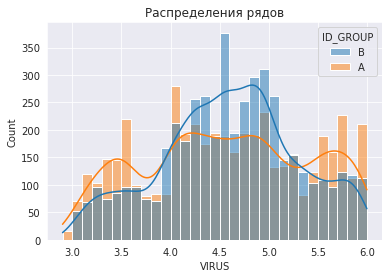

In [54]:
# Рисую гистограмму распределения рядов

with sns.axes_style("darkgrid"):
    ax = sns.histplot(df1_cor, x = 'VIRUS', hue = 'ID_GROUP', kde = True)
    ax.set_title('Распределения рядов')
plt.show()

In [23]:
df1_A = df1_cor.loc[df1_cor['ID_GROUP'] == 'A']
df1_B = df1_cor.loc[df1_cor['ID_GROUP'] == 'B']

T-test
t-критерий =  -1.7263890950249856
p-value =  0.08431004367952279
среднее группы А =  4.571635553669897
среднее группы B =  4.5988466386554485
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  11006174.0
p-value =  0.1092987428236025


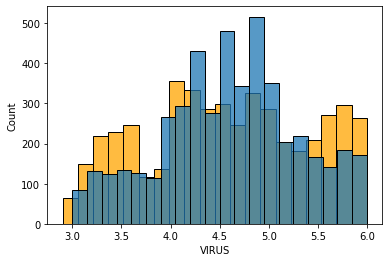

In [78]:
# Сравнение распределений
t_test(df1_A['VIRUS'], df1_B['VIRUS'])

#### Выводы:

- воздействия вирусов одинаковы

### Анализ воздействия двух вирусов (вируса-Т, вируса-G) в разрезе городов и гендера
[top](#Table-of-Contents)

In [25]:
# Функция для сравнения двух распределений в разрезе двух признаков

def city_gender(city, gender):
    df1_A = df1_cor.loc[(df1_cor['ID_GROUP'] == 'A') \
                        & (df1_cor['GENDER'] == gender) \
                        & (df1_cor['ID_CITY'] == city)]
    df1_B = df1_cor.loc[(df1_cor['ID_GROUP'] == 'B') \
                        & (df1_cor['GENDER'] == gender) \
                        & (df1_cor['ID_CITY'] == city)]
    print(f'Результат для города {city} и пола {gender}')
    t_test(df1_A['VIRUS'], df1_B['VIRUS'])
    return

In [26]:
# список признаков по городам
city_list = df1_cor['ID_CITY'].unique().tolist()
city_list

['New York', 'Moscow', 'Tokyo']

In [27]:
# список признаков по полу
gender_list = df1_cor['GENDER'].unique().tolist()
gender_list

['F', 'M']

Результат для города New York и пола F
T-test
t-критерий =  -0.7814379960453522
p-value =  0.43467128015557643
среднее группы А =  4.4639501312336005
среднее группы B =  4.491903409090911
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  265555.0
p-value =  0.7417602927462976


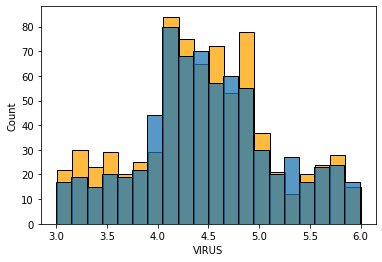

Результат для города New York и пола M
T-test
t-критерий =  -4.486828818733005
p-value =  7.765363836443733e-06
среднее группы А =  4.50032509752925
среднее группы B =  4.6635917312661554
Нулевая гипотеза о равенстве средних не принимается

По Манну-Уитни распределения не равны
t-критерий =  254509.5
p-value =  8.465890885616095e-07


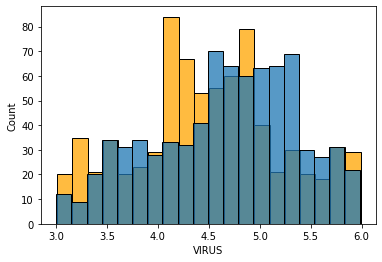

Результат для города Moscow и пола F
T-test
t-критерий =  -0.010906354031799974
p-value =  0.991298980732889
среднее группы А =  4.698286151491958
среднее группы B =  4.698598962194211
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  883587.0
p-value =  0.9187694739581085


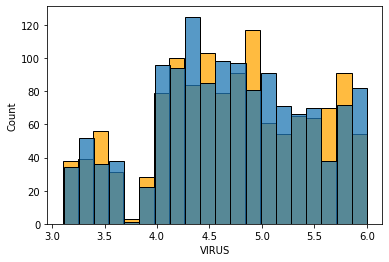

Результат для города Moscow и пола M
T-test
t-критерий =  0.35218572257160297
p-value =  0.7247332297400618
среднее группы А =  4.605425925925935
среднее группы B =  4.593168044077143
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  615954.0
p-value =  0.05566731410195068


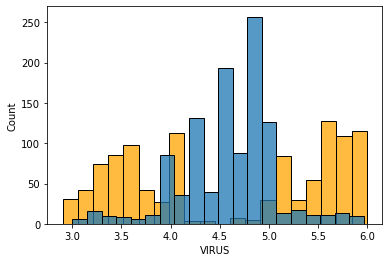

Результат для города Tokyo и пола F
T-test
t-критерий =  1.4815354034739137
p-value =  0.13884440075221502
среднее группы А =  4.5432089552238795
среднее группы B =  4.457803738317758
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  91269.5
p-value =  0.12892441095186205


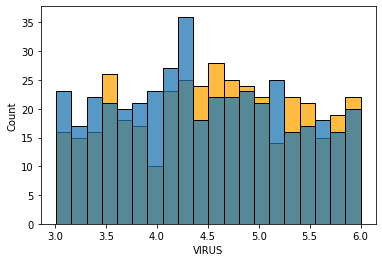

Результат для города Tokyo и пола M
T-test
t-критерий =  -1.0186706182968848
p-value =  0.30866427692644405
среднее группы А =  4.435329949238576
среднее группы B =  4.495865384615383
Нулевая гипотеза о равенстве средних принимается

По Манну-Уитни распределения равны
t-критерий =  78987.5
p-value =  0.3731584747637985


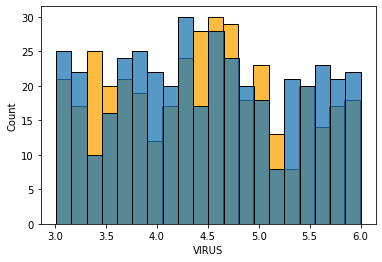

In [79]:
# Сравнение распределений в разрезе городов и гендера

for i in city_list:
    for j in gender_list:
        city_gender(i,j)
        

#### Выводы:

- для города New York и пола M воздействие вирусов отличается
- для остальных комбинаций городов и пола воздействия вирусов одинаковы

## Анализ связи между средним пульсом человека и интенсивностью распространения G и T-вирусов
[top](#Table-of-Contents)

In [52]:
# Группирую данные из двух датасетов

Umbrella_experiment = df1.merge(df2, how = 'inner', on = 'ID_SIMPERS')
Umbrella_experiment.head()

,ID_SIMPERS,VIRUS,ID_GROUP,GENDER,ID_CITY,PULSE
0,1007416,3.58,B,F,New York,81
1,1001664,5.80,A,M,Moscow,78
2,1007900,3.37,B,F,Tokyo,86
3,1007900,3.37,B,F,Tokyo,86
4,1006219,3.81,B,M,New York,82


In [53]:
# Проверяю, если ли null
Umbrella_experiment.isnull().sum()

ID_SIMPERS    0
VIRUS         0
ID_GROUP      0
GENDER        0
ID_CITY       0
PULSE         0
dtype: int64

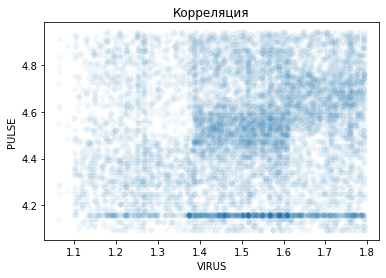

In [148]:
# Строю диаграмму рассеяния сравниваемых рядов
# применим логарифмирование, для более чёткого выявления зависимости
ax = sns.scatterplot(x = np.log(Umbrella_experiment['VIRUS']),
                     y = np.log(Umbrella_experiment['PULSE']),
                     alpha = 0.05)
plt.title('Корреляция')
plt.show()

- ***Визуально корреляцию `VIRUS` и `PULSE` трудно отследить***  
поэтому посмотрим отдельно по параметрам

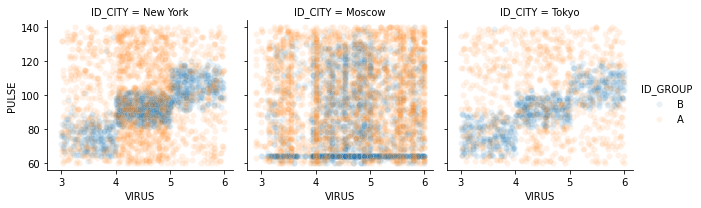

In [123]:
# Корреляция VIRUS и PULSE для интенсивности распространения G и T-вирусов по городам

grid = sns.FacetGrid(Umbrella_experiment, col='ID_CITY',hue='ID_GROUP',
                     col_wrap=3)
grid.map(sns.scatterplot, 'VIRUS', 'PULSE', alpha = 0.1)
grid.add_legend()
plt.show()

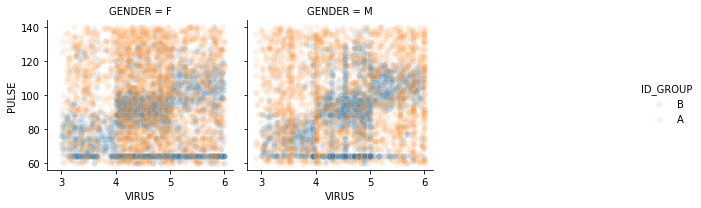

In [118]:
# Корреляция интенсивности распространения G и T-вирусов по половому признаку

grid = sns.FacetGrid(Umbrella_experiment, col='GENDER', hue='ID_GROUP',
                     col_wrap=2)
grid.map(sns.scatterplot, 'VIRUS', 'PULSE', alpha = 0.1)
grid.add_legend()
plt.show()

- ***Вижу, что корреляция `VIRUS` и `PULSE` для G-вируса не прослеживается, в отличии от Т-вируса***  
посмотрю только для него (`ID_GROUP`=B)

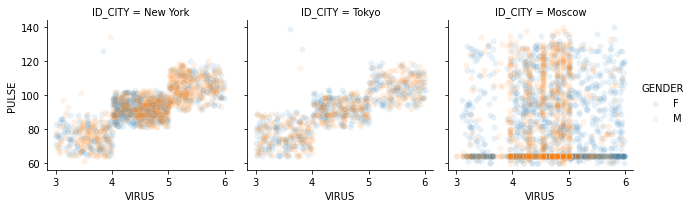

In [122]:
# Корреляция интенсивности распространения T-вируса по городам и полу

grid = sns.FacetGrid(Umbrella_experiment[(Umbrella_experiment['ID_GROUP'] == 'B')],\
                     col='ID_CITY', hue='GENDER',col_wrap=3)
grid.map(sns.scatterplot, 'VIRUS', 'PULSE', alpha = 0.1)
grid.add_legend()
plt.show()

***Наблюдаю визуальную корреляцию `VIRUS` и `PULSE` для обоих полов, для городов New York и Tokyo, для T-вируса***  
   - подсчитаю для них коэффициенты корреляции
   - для Москвы по мужскому полу тоже видна связь, но её рассматривать в данной работе не буду

In [142]:
df_corr = Umbrella_experiment[(Umbrella_experiment['ID_CITY'].isin(('New York', 'Tokyo'))) \
                                     & (Umbrella_experiment['ID_GROUP'] == 'B')]

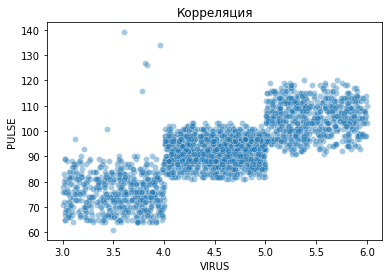

In [143]:
# Строю диаграмму рассеяния сравниваемых рядов
ax = sns.scatterplot(x = df_corr['VIRUS'], y = df_corr['PULSE'], alpha = 0.4)
plt.title('Корреляция')
plt.show()

In [144]:
# Рассчитываю коэффициенты корреляции

k_pearson, p_pearson = stats.pearsonr(df_corr['VIRUS'], df_corr['PULSE'])
k_spearman, p_spearman = stats.spearmanr(df_corr['VIRUS'], df_corr['PULSE'])
    
if p_pearson > 0.05 or p_spearman > 0.05:
    print('Корреляция равна нулю.')
else:
    if k_spearman <= 0.3:
        print('Корреляция является слабой.')
    elif k_spearman <= 0.7:
        print('Корреляция является средней.')
    else:
        print('Корреляция является сильной.')
        
k_pearson, k_spearman

Корреляция является сильной.


(0.7851039014612657, 0.796680324264687)

### Выводы:
Наблюдается сильная корреляция между пульсом и новой модификацией вируса (T-вирус) в двух городах New York и Tokyo